# Multilevel Models for Binary Responses 

### The Bangladesh Demographic and Health Survey 2004 Dataset

This tutorial will be analysing data from the Bangladesh Demographic and Health Survey (BDHS), a nationally representative cross-sectional survey of women of reproductive age (13-49 years).   

The response variable (antemed) is a binary indicator of whether a woman received antenatal care from a medically-trained provider (a doctor, nurse or midwife) at least once before her most recent live birth.  

In this practical, multilevel models are used to allow for and to explore between-community variance in antenatal care. The data have a two-level hierarchical structure with 5366 women at level 1, nested within 361 communities at level 2. In rural areas a community corresponds to a village, while an urban community is a neighbourhood based on census definitions.

A range of predictorvariables will be considered. At level 1, variables such as a woman’s age at the time of the birth and education. Level 2 variables include an indicator of whether the region of residence is classified as urban or rural.  Further community-level measures can be derived by aggregating woman-level variables, for example the proportion of respondents in the community who are in the top quintile of a wealth index. 

The file contains the following variables:


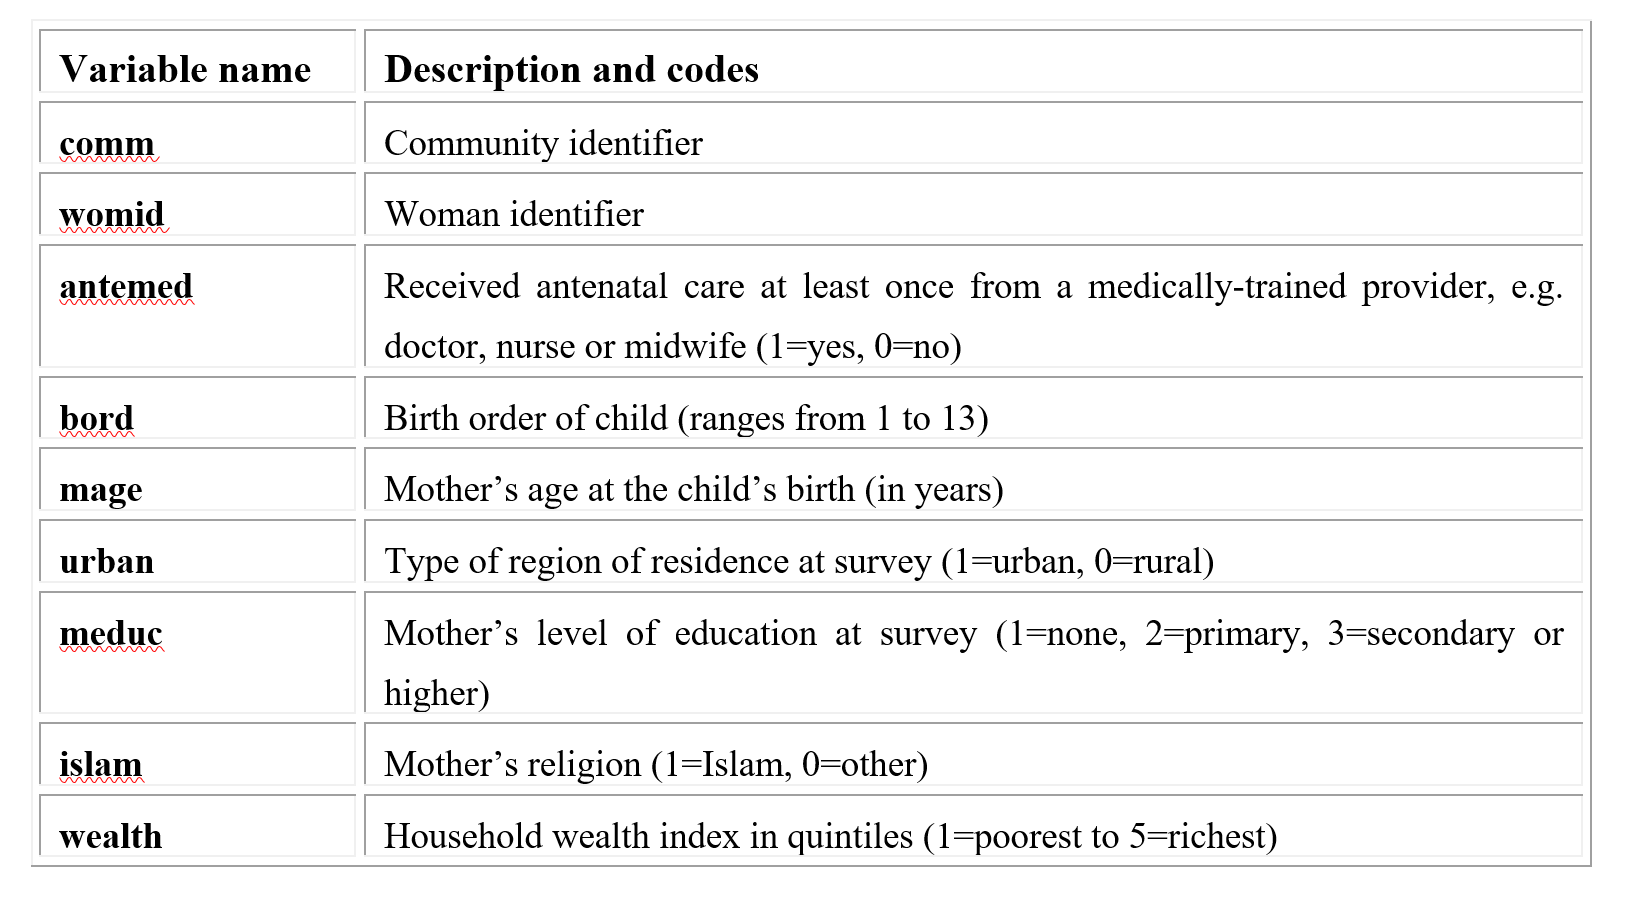

Open the Stata dataset antenatal.dta

In [ ]:
library (foreign)
bang <- read.dta ("antenatal.dta")
bang$comm <- as.factor (bang$comm)

The third command above ensures that the variable "comm", which identifies the community in which each woman lives, is treated as a factor variable.  This will have no impact on the estimation of models, but will ensure commands used in previous sessions for presenting model findings (notably "sjplot") work correctly. 

### Two-level Null Model

The "table" command can be sued to check that the dependent variable ("antemed") is indeed coded 0,1, and to see the number of cases in each of those categories.  In this case, the two categories are relatively evenly split meaning that logistic regression can be considered an appropriate form of model.

In [ ]:
table (bang$antemed)

As in previous seesions begin by fitting a null or empty two-level model; that is a model with only an intercept and community effects.  The fitting of multi-level logit models is achieved through the "glmer" command in the "lme4" package.  This is the same package used in previous sessions and is loaded as shown below.

In [ ]:
library (lme4)

The "glmer" command is used for multilevel mixed-effects generalised linear models. The broad syntax of this command is the same as the "lmer" command used in previous tutorials. The "glmer" command requires additional arguments to be provided, notably "family" which states the distribution that the distrbution the dependent variable follows.

This session begins by fitting a random effects logit regression of y (with no explanatory variables), also known as variance components model, for the probability of receiving antenatal care at least once with community random effects. The formula of the model is:

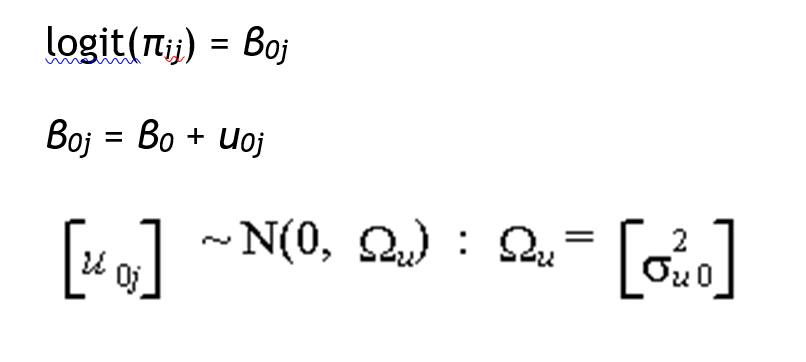

The R syntax below loads the "lme4" package and then fits the two-level logit model (with women clustered in communities).  Note that as the dependent variable is binary, the family is set to "binomial".  Setting the link argument to "logit" requests a logit regression model is estimated.

In [ ]:
library (lme4)

nullmodel <- glmer (antemed~1+(1|comm), data=bang, family=binomial)
summary (nullmodel)

The intercept   consists of two components: a fixed effect , shared by all communities, and a random effect u0j, specific to community j.  The random effect is assumed to follow a normal distribution with covariance matrix   which in this simple model contains just one element, the between-community variance .



From the estimates of the model above, we can say that the log-odds of receiving antenatal care from a medically-trained provider in an ‘average’ community (one with u0j = 0) is estimated as β0 = 0.149. We can calculate the odds by exponentiating the estimated coefficient for β0 for an ‘average’ community (with uj = 0) such as exp(0.149) = 1.16, and the corresponding probability is 1.16/(1+1.16) = 0.53.

The intercept for community j is 0.149 + uj  , where the variance of uj is estimated as 1.464.  


As with linear models, log likelihood values can be used to compare model fit and establish if the multilevel approach is required (i.e. the multilevel model fits the data better than a single level model).  The syntax below runs a single level logit model, and reports the log likelihood values for each model.

The difference in log likelihood values is circa 400, so comparing to the chi-squared distribution with 1 degree of freedom (note df=1 for the single level model and 2 for the two-level model) suggests the multilevel model is most appropriate.

In [ ]:
singlelogit <-glm (antemed~1, data=bang, family=binomial)
logLik(singlelogit)
logLik(nullmodel)

### Looking at Residuals ###

Note that are no level-1 residuals in logit models as expected value = pi

As with previous linear models, it is possible to the level 2 residuals in order to get a sense of the amount of variation between communities.  The syntax below produces the relevant caterpillar plot showing variation in intercepts between the different communities based on "nullmodel".  This syntax is the same as in previous sessions.  

In [ ]:
library (lattice)
dotplot(ranef(nullmodel))

The plot shows the estimated residuals for all 361 communities in the sample. For a number of communities, the 95% confidence interval does not overlap the vertical line at zero, indicating that uptake of antenatal care in these communities is significantly above average (to the right of the zero line) or below average (to the left of the zero line). The relatively large standard errors are due to the small number of individuals (sample size) in each of the communities, leading to large standard errors for the estimated community residual u0j.

### Adding an Explanatory Variable - Random Intercept Model

Next, expand the model to include maternal age as an explanatory variable in the model.


Expanding the null multilevel logit regression ("nullmodel" above) to be a random intercept model is teh same as for previous linear models; the explanatory variable(s) are added to the model fomula, seperated by "+" as shown below, i.e the syntax below would add a woman's age as a level 1 explanatory variable. 

In [ ]:
ri1 <- glmer (antemed~ 1+mage + (1|comm), data=bang, family=binomial)
summary (ri1)

The first point of note in the above output is the error message “Model failed to converge with max|grad| = 0.00151189 (tol = 0.001, component 1)”.

This message is similar to those seen in the session on random slope models, where estimation settings were changed to help estimate more complex models.

In the case of generalised mixed effect models, the "nAGQ" argument is often useful for achieving convergance. This argument states how many points are used for evaluating the adaptive Gauss-Hermite approximation to the log-likelihood.  The default value of 1 corresponding to the Laplace approximation. Values greater than 1 produce greater accuracy in the evaluation of the log-likelihood at the expense of speed. A value of zero uses a faster but less exact form of parameter estimation for GLMMs.

Hence the command below requests more points be used, providing a more "accurate result", and allowing converagnce to be achieved (however, note this model is noticably slower to estimate).

In [ ]:
ri2 <- glmer (antemed~ 1+mage + (1|comm), data=bang, family=binomial, nAGQ=10)
summary (ri2)

In contrast, the code below sees nAGQ set to zero.  Estimation is again achieved, and is much quicker.  However, compare the coefficient for "mage" produced below to that presented above - it is notiably different.  It might be using "nAGQ=0" is useful when exploring different possible models, before turning up estimation settings to check the findings of final models.

In [ ]:
ri3 <- glmer (antemed~ 1+mage + (1|comm), data=bang, family=binomial, nAGQ=0)
summary (ri3)

The success of model convergance is also dependent on the coding of the variables been considered, in particular it can be important to try and ensure that the zero value of a variable is meaningful, and hence likely to correspond to a resonable outcome.  

In the above model, mage=0 makes only limited sense since it represents the likelihood of a new born girl making use of antenatal medical care.  Centering the variable could help address this concern.  The "scale" command can be used to center age on the mean age of those in the data.  Alternatively, the youngest woman in the dataset is aged 13, and so the command below creates a new age variable where that person's age is set to zero and other ages expressed relative to that person.

The model (ri4) is estimated with the default settings, used for "ri1", but now succesfully converges.

In [ ]:
bang$mage2 <- bang$mage-13

ri4 <- glmer (antemed~ 1+mage2 + (1|comm), data=bang, family=binomial)
summary (ri4)


Note that there is little change in the estimate of the between-community variance (1.462 compared to 1.464 in model ri1), suggesting that the distribution of maternal age is similar across communities, and that controlling for it does little to explain variation in outcome across communities.

The equation of the average fitted regression line, expressing the relationship between the log-odds of receiving antenatal care and maternal age is:


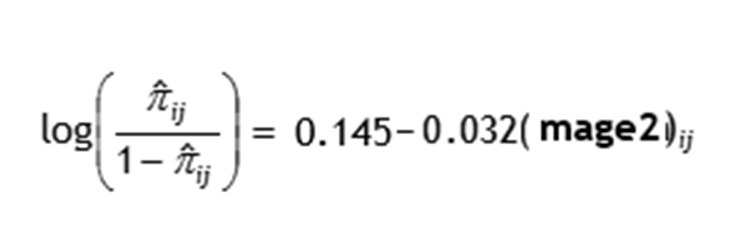

The fitted line for a given community will differ from the average line in its intercept, by an amount   for community j. A plot of the predicted community lines will therefore show a set of parallel lines with negative slopes as a function of age.

### Expanding the Model ###

It is possible to think of several ways in which the basic random intercept model above can be expanded:

    1) Adding a quadratic function of age to teh model to check if the relationship with age is curvi-linear
    2) Adding additional explanatory variables (at both the indivdual and community levels)
    3) Testing to see if random slopes associated with different level 1 explanatory variables add to the explanation.

You may consider any of the ideas above that you think are of interest and try modifying the above syntax to run appropriate regression models.

N.B the changes to syntax required to introduce random slopes is the same as in lab session 3, that is to say that the lower level variables that are to be treated as random should be included in the random part of the model formula,

i.e. rs1 <- glmer (antemed~ 1+mage2 + (1+mage2|comm), data=bang, family=binomial)

although, in this case, the above model will result in a warning about "singularity", a topic mentioned in a previous lab session. See the "Details" section of https://rdrr.io/cran/lme4/man/isSingular.html for more information.  


### Variance Partition Coefficient

Level 1 variance in a multilevel logit model has a fixed value of 3.29 (pi).  VPC measures can therefore be calculated as in lab session 2, but using 3.29 as the level 1 variance.

Going back to model "nullmodel", level 2 variance is given as 1.464.

The variance partition coefficient (VPC) is calculated as 1.464/(1.464+3.29) = 0.308.

It might therefore be tempting to conclude that 30.8% of the variation in the use of antenatal medical care is attributable to the community level.  However, this is a highly contested interpretation and something that should not be compared between models.

Consider the equivilent calculation for the random intercept model (ri4).  The VPC would be calculated as 1.462/(1.462+3.29).

However, since "ri4" includes a level 1 explanatory variable, and assuming that variable might have some explanatory power (the z-score associated with the variable would suggest it does) then it can be argued that the amount of unexplained variance in model "ri4" will be less than in "nullmodel", yet it is treated as 3.29 in both calculations above.

In short, comparing raw vpc values between different multilevel logit regressions is likely to lead to erronious conclusions about the relative importance of level 2.

A more approprate approach is to simply evaluate if the level 2 variance has changed across models, as with the comparrison made earlier where it was suggested that introducing a woman's age to the model had done little to explain variation in outcome between communities.

